In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# getting numpy to tfrecords 
# data is larger thank 10 gb
# tfrecords are huge on disk
# < tf.tensor : shape dtype:tf.string numpy='//b10iurerue'>
# thats how each record looks when loading tfrecords with tensorflow


In [3]:
data=np.load('../../dataverse_files/Dataset5_raw_test.npz')

data.files
data['image_label'][0].tobytes()
    
    

b'\x00\x00\x00\x00\x00\x00\x00\x00'

In [4]:
# data['image'][0].shape
# #data['image_label'][0]

In [5]:
# [key for key in data.keys()]
224*224*3

150528

In [6]:
# import tensorflow as tf
# import numpy as np

# # This was useful
# # see http://stackoverflow.com/questions/33849617/how-do-i-convert-a-directory-of-jpeg-images-to-tfrecords-file-in-tensorflow

# # Example numpy file.
# # files = ['CH_7381_8380_1478761500.9.npz']

def _int64list_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

# class NumpyToTFHelper(object):
#     def __init__(self,filenames):
#         self.filenames = filenames
#         self.current_file = -1
#         self.current_index = 0 
#         self.data=None
#     def get_next(self):
#         if self.current_file == -1: 
#             self.current_file += 1
#             self.data=np.load(self.filenames[self.current_file])
#             self.image= self.data['image'][0:4]
#             self.label = self.data['image_label'][0:4]
#         elif self.current_index == self.label.shape[0]-1:
            
#             if self.current_file == len(self.filenames) - 1 :
#                 return None
#             self.current_file += 1
#             self.data=np.load(self.filenames[self.current_file])
#             self.image= self.data['image'][0:4]
#             self.label = self.data['image_label'][0:4]
#             self.current_index = 0 
#         self.current_index += 1 
#         # return single 16000 length record
#         image = self.image[self.current_index -1] 
#         label= self.label[self.current_index-1]
#         print(label.shape,self.current_index)
# #         print(type(cur))              
#         return image,int(label[0])

# filename = "../data/train.tfrecord"
# print('Writing', filename)
# writer = tf.io.TFRecordWriter(filename)
# N = NumpyToTFHelper(['../../dataverse_files/Dataset5_raw_val.npz']) 
# record = N.get_next()
# image,label=record
# while record is not None:
#     #raw = n.tostring()
#     # remember to read back to numpy array, will need to specify that int was used.
#     feature={'image': _bytes_feature(image.tobytes()),
#              'label':_int64_feature(label),}
#     example = tf.train.Example(features=tf.train.Features(feature=feature)) 
#     writer.write(example.SerializeToString())
#     break
    
#     record = N.get_next()
#     if record==None:
#         break
#     image,label=record
# writer.close()

In [7]:
dt=np.matrix([[1,2,3],[4,5,6]]).A1.tobytes()
t=tf.io.decode_raw(dt,tf.int64)
t


<tf.Tensor: shape=(3,), dtype=int64, numpy=array([ 8589934593, 17179869187, 25769803781], dtype=int64)>

In [8]:
class npztfrecords:
    def __init__(self,npzfile:str) -> None:
        self.data=np.load(npzfile)
        self.image=self.data['image']
        self.label=self.data['image_label']
        self.length=self.label.shape[0]
    def get_data(self):
        for i in range(0,self.length):
        
            yield self.image[i].astype(np.float32), self.label[i]
    def write_to_tf(self,tf_record_path):
        tfrecord_filename = tf_record_path
        with tf.io.TFRecordWriter(tfrecord_filename) as writer:
            for image, label in self.get_data():
                feature={'image': _bytes_feature(image.tobytes()),
                  'label':_bytes_feature(label.tobytes()),}
                example = tf.train.Example(features=tf.train.Features(feature=feature)) 
                writer.write(example.SerializeToString(),)
        
            
        
    
        

In [9]:
# records=npztfrecords('../../dataverse_files/Dataset5_raw_val.npz')

In [10]:
# records.write_to_tf('../data/val.tfrecord')

In [11]:
# filename = "../data/test.tfrecord"
# print('Writing', filename)
# writer = tf.io.TFRecordWriter(filename)
# N = NumpyToTFHelper(['../../dataverse_files/Dataset5_raw_val.npz']) 

#     #raw = n.tostring()
#     # remember to read back to numpy array, will need to specify that int was used.
# feature={'image': _bytes_feature(image),
#              'label':_int64_feature(label),}
# example = tf.train.Example(features=tf.train.Features(feature=feature)) 
# writer.write(example.SerializeToString())
# writer.close()

In [12]:
dataset=tf.data.TFRecordDataset('../data/train.tfrecord',compression_type=None)

In [13]:
# def parser
# tf.io.parse_single_example()

In [14]:
dataset

<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [15]:
def parse(es):
    return tf.io.parse_single_example(es,{'image':tf.io.FixedLenFeature([],tf.string),
                                   'label':tf.io.FixedLenFeature([],tf.uint8)})

In [17]:
# dataset=dataset.map(parse)

In [18]:
# for _ in dataset.take(1):
#     print(_)

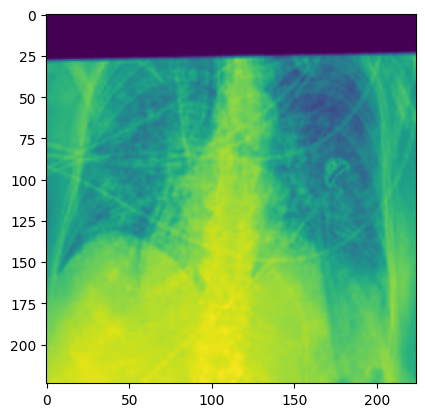

In [18]:
for raw_record in dataset.take(3):
    plt.imshow(tf.transpose(tf.reshape(tf.io.decode_raw(raw_record['image'],tf.float32),[224,224,3]),[2,0,1]).numpy().mean(0))
    #import 
    #tf.io.decode_raw(raw_record['image'],tf.float64)
    # tf.float64 is similar np.float64 as data was loaded from npz
    #print(raw_record['label'])

In [90]:
# for raw_record in raw_dataset.take(1):
#   example = tf.train.Example()
#   example.ParseFromString(raw_record.numpy())
#   print(example)

In [19]:
dataset=tf.data.TFRecordDataset(['../data/test.tfrecord'],num_parallel_reads=4)

In [6]:
# # feature_description = {
# #     'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
# #     'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
# #     'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
# #     'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
# # }

# feature_description={
#     'image':tf.io.FixedLenFeature([],tf.string)
#     'label':tf.io.FixedLenFeature([],tf.int64)
# }

In [7]:
# def parse_records(example_proto):
#     feature_description={
#     'image':tf.io.FixedLenFeature([],tf.string),
#     'label':tf.io.FixedLenFeature([],tf.int64)}
#     feature=tf.io.parse_single_example(example_proto,feature_description)
#     image=tf.reshape(tf.io.decode_raw(feature['image'],tf.float32),[224,224,3])
    
#     label=feature['label']
#     return image,label

In [20]:
def parse_records(example_proto):
    feature_description={
    'image':tf.io.FixedLenFeature([],tf.string),
    'label':tf.io.FixedLenFeature([],tf.string)}
    feature=tf.io.parse_single_example(example_proto,feature_description)
    image=tf.reshape(tf.io.decode_raw(feature['image'],tf.float32),[224,224,3])
    label=tf.cast(tf.io.decode_raw(feature['label'],tf.float64),tf.int64)
    
    #label=tf.cast(feature['label'],tf.int32)
    return image,label

In [21]:
dataset=dataset.map(parse_records).shuffle(96).repeat(1).batch(32).prefetch(1)

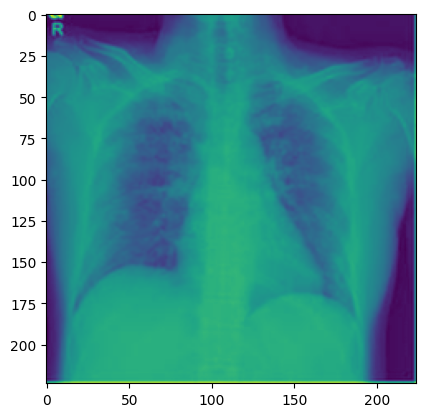

In [25]:
for raw_record in dataset.take(1):
    plt.imshow(tf.transpose(raw_record[0][0],[2,0,1]).numpy().mean(0))
    #plt.imshow(tf.transpose(raw_record['image'],[2,0,1]).numpy().mean(0))
    #import 
    #tf.io.decode_raw(raw_record['image'],tf.float64)
    # tf.float64 is similar np.float64 as data was loaded from npz
    #print(raw_record['label'])

In [58]:
npint(1)

int

In [10]:
model=tf.keras.models.Sequential([
    tf.keras.Input((224,224,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),)

In [12]:
model.fit(dataset,batch_size=32,epochs=1)

613/613 [==============================] - 197s 315ms/step - loss: 9008.3740


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 19,268,357
Trainable params: 19,268,357
Non-trainable params: 0
_________________________________________________________________


In [23]:
dataset.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, None), dtype=tf.int64, name=None))

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
m.build([None, 224, 224, 3])  # Batch input shape.
